In [5]:
from __future__ import print_function

import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 203s 3ms/step - loss: 0.2293 - acc: 0.9300 - val_loss: 0.0503 - val_acc: 0.9839
Epoch 2/5
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0840 - acc: 0.9752 - val_loss: 0.0344 - val_acc: 0.9884
Epoch 3/5
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0614 - acc: 0.9815 - val_loss: 0.0306 - val_acc: 0.9901
Epoch 4/5
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0515 - acc: 0.9837 - val_loss: 0.0316 - val_acc: 0.9892
Epoch 5/5
60000/60000 [==============================] - 183s 3ms/step - loss: 0.0443 - acc: 0.9861 - val_loss: 0.0262 - val_acc: 0.9920
Test loss: 0.026211383942996325
Test accuracy: 0.992


## Gradcam

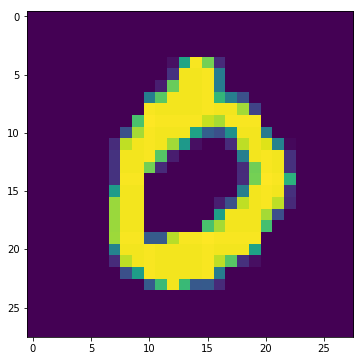

In [2]:
#Visualize grad-CAM

from vis.visualization import visualize_cam
from matplotlib import pyplot as plt
%matplotlib inline
from vis.utils import utils

class_idx = 0
indices = np.where(y_test[:, class_idx] == 1.)[0]
# pick some random input from here.
idx = indices[0]
# Lets sanity check the picked image.
plt.rcParams['figure.figsize'] = (18, 6)

plt.imshow(x_test[idx][..., 0])


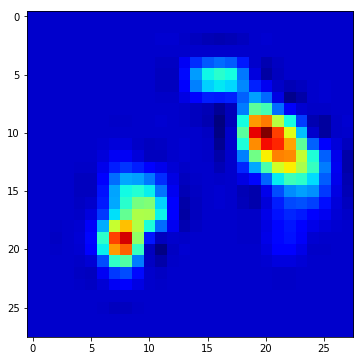

In [3]:
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

grads = visualize_cam(model, layer_idx, filter_indices=class_idx, seed_input=x_test[idx])

# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

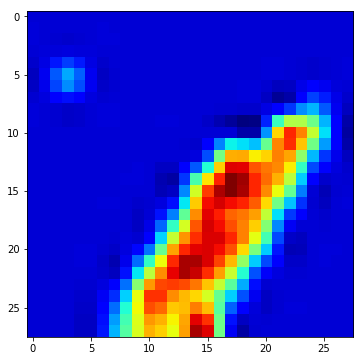

In [4]:
#Visualize grad-CAM

from vis.visualization import visualize_cam
from matplotlib import pyplot as plt
%matplotlib inline
from vis.utils import utils

class_idx = 7
indices = np.where(y_test[:, class_idx] == 1.)[0]
# pick some random input from here.
idx = indices[0]
# Lets sanity check the picked image.
plt.rcParams['figure.figsize'] = (18, 6)

plt.imshow(x_test[idx][..., 0])
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

grads = visualize_cam(model, layer_idx, filter_indices=class_idx, seed_input=x_test[idx])

# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')